In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

# Get sequence lengths

In [11]:
# Training 
train = []
with open('data/proteins.train.txt', 'r') as f: 
    for line in f: 
        train.append(len(line[:-1]))

# Print stats 
print('# TRAINING SET')
print('Minimum:', min(train))
print('Maximum:', max(train))
print('Mean:', np.mean(train))
print('Median:', np.median(train))
#print('Percentiles:', np.percentile(train, [0, 25, 50, 75, 100]))

# TRAINING SET
Minimum: 21
Maximum: 71981
Mean: 1005.1242793485548
Median: 693.0


In [13]:
# Validation
valid = []
with open('data/proteins.val.txt', 'r') as f: 
    for line in f: 
        valid.append(len(line[:-1]))

# Print stats 
print('# VALIDATION SET')
print('Minimum:', min(valid))
print('Maximum:', max(valid))
print('Mean:', np.mean(valid))
print('Median:', np.median(valid))

# VALIDATION SET
Minimum: 21
Maximum: 58303
Mean: 963.4025790852307
Median: 663.0


In [14]:
# Test
test = []
with open('data/proteins.test.txt', 'r') as f: 
    for line in f: 
        test.append(len(line[:-1]))

# Print stats 
print('# TEST SET')
print('Minimum:', min(test))
print('Maximum:', max(test))
print('Mean:', np.mean(test))
print('Median:', np.median(test))

# TEST SET
Minimum: 21
Maximum: 29013
Mean: 963.9613078744521
Median: 671.0


In [ ]:
# The median and mean of all sets are below 1000 and close to 1000, respectively. 
# Therefore, only those with length 1000 and below are plotted. 




# Plot sequence lengths

([array([1.26159e+05, 5.52000e+02, 6.50000e+01, 7.00000e+00, 2.00000e+00,
         2.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 5.00000e+00]),
  array([1.9757e+04, 8.9000e+01, 4.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00]),
  array([3.9501e+04, 1.8200e+02, 1.1000e+01, 3.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])],
 array([2.1000e+01, 7.2170e+03, 1.4413e+04, 2.1609e+04, 2.8805e+04,
        3.6001e+04, 4.3197e+04, 5.0393e+04, 5.7589e+04, 6.4785e+04,
        7.1981e+04]),
 <a list of 3 Lists of Patches objects>)

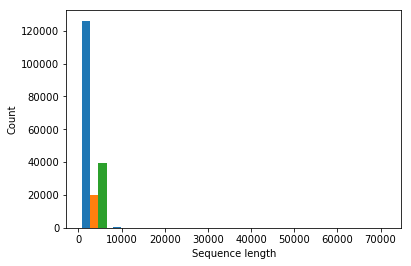

In [31]:
# Set up figure
fig = plt.figure()
plt.xlabel('Sequence length')
plt.ylabel('Count')
plt.hist([train, valid, test])